In [1]:
import os
os.chdir('/home')

import gym

from pavlov import pipeline
from pavlov.pipeline import transformations
from pavlov import models
from pavlov import actors
from pavlov import agents
from pavlov import auxiliary

from keras import optimizers

Using TensorFlow backend.


ModuleNotFoundError: No module named 'custom_inherit'

In [2]:
env = gym.make('CartPole-v1')
"""
base_config = {
    'layer_sizes': [128],
    'activation': 'relu'
}
dqn_config = {
    'gamma': 0.99,
    'tau': 1.0,
    'optimizer': optimizers.SGD(lr=0.03)
}
topology = models.topology.DenseTopology(**base_config)
model = models.DQNModel(topology, **dqn_config)

epsilon_schedule = auxiliary.schedules.LinearDecaySchedule(1.0, 0.1, 500, -1)
actor = actors.EpsilonGreedyActor(epsilon_schedule)
buffer_size = 10000
batch_size = 64

pline = pipeline.Pipeline()
agent = agents.Agent(env,
                     state_pipeline=pline,
                     model=model, actor=actor,
                     buffer_size=buffer_size, batch_size=batch_size,
                     report_frequency=10, warmup_length=50)
"""

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


"\nbase_config = {\n    'layer_sizes': [128],\n    'activation': 'relu'\n}\ndqn_config = {\n    'gamma': 0.99,\n    'tau': 1.0,\n    'optimizer': optimizers.SGD(lr=0.03)\n}\ntopology = models.topology.DenseTopology(**base_config)\nmodel = models.DQNModel(topology, **dqn_config)\n\nepsilon_schedule = auxiliary.schedules.LinearDecaySchedule(1.0, 0.1, 500, -1)\nactor = actors.EpsilonGreedyActor(epsilon_schedule)\nbuffer_size = 10000\nbatch_size = 64\n\npline = pipeline.Pipeline()\nagent = agents.Agent(env,\n                     state_pipeline=pline,\n                     model=model, actor=actor,\n                     buffer_size=buffer_size, batch_size=batch_size,\n                     report_frequency=10, warmup_length=50)\n"

In [3]:
env.render('rgb_array')

NoSuchDisplayException: Cannot connect to "None"

In [3]:
agent.run_indefinitely()

Terminating.


/home/pavlov/models/dqn.py:76: RuntimeWarning: invalid value encountered in multiply
  targets = targets * actions  # makes it one-hot, value in the place of the action


ValueError: Model has hit NaN weights: check #37 here: https://tinyurl.com/yahuwbno

In [ ]:
# CARTPOLE

env = gym.make('Breakout-v0')

topology_config = {
    'layer_sizes': [128],
    'activation': 'relu'
}
topology = models.topology.DenseTopology(**topology_config)

dqn_config = {
    'gamma': 0.99,
    'tau': 1.0,
    'optimizer': optimizers.Adam(0.0001)
}
model = models.DQNModel(topology, **dqn_config)

epsilon_schedule = auxiliary.schedules.LinearDecay(1.0, 0.1, 500, -1)
actor = actors.EpsilonGreedyActor(epsilon_schedule)
buffer_size = 10000
batch_size = 64

pline = pipeline.Pipeline()
pline.add(transformations.rgb_to_grey())
pline.add(transformations.downsample(new_shape=(84, 84)))
pline.add(transformations.combine_consecutive(2, 'max'))
pline.add(transformations.stack_consecutive(4))

agent = agents.Agent(env,
                     state_pipeline=pline,
                     model=model, actor=actor,
                     buffer_size=buffer_size, batch_size=batch_size,
                     report_freq=1, warmup_length=5)
agent.run_episode(render=True)

In [ ]:
agent.episode_to_mp4(1, '/home/videos')

In [26]:
from PIL import Image
def get_rgb_array(image_path):
    image = Image.open(image_path)
    image_rgb = image.convert('RGBA')
    data = np.array(image_rgb)
    return data

In [28]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [41]:
get_rgb_array('kill-feed.jpg')[41,180:185,].mean(axis=1)

array([182.5 , 194.25, 196.25, 181.  , 155.  ])

In [60]:
grey = transformations.rgb_to_grey('lightness')(get_rgb_array('kill-feed.jpg')[:,:,:3], 0)

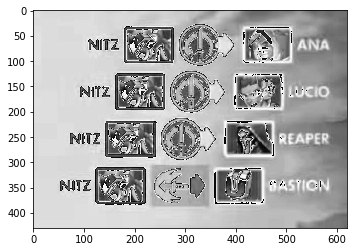

In [61]:
plt.imshow(grey, cmap='gray')

In [59]:
transformations.rgb_to_grey

<function pavlov.pipeline.transformations.rgb_to_grey(method='luminosity')>